In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df = pd.read_csv("E:/churn-bigml-20.csv")


In [113]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [114]:

df.info()
df.describe()
print("Missing values per column:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

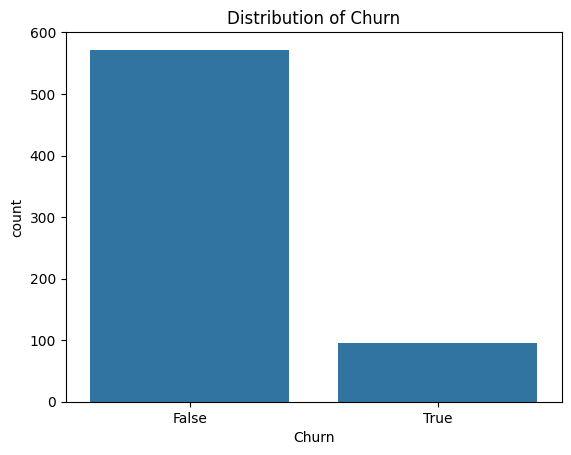

In [117]:
sns.countplot(x="Churn", data=df)
plt.title("Distribution of Churn")
plt.show()

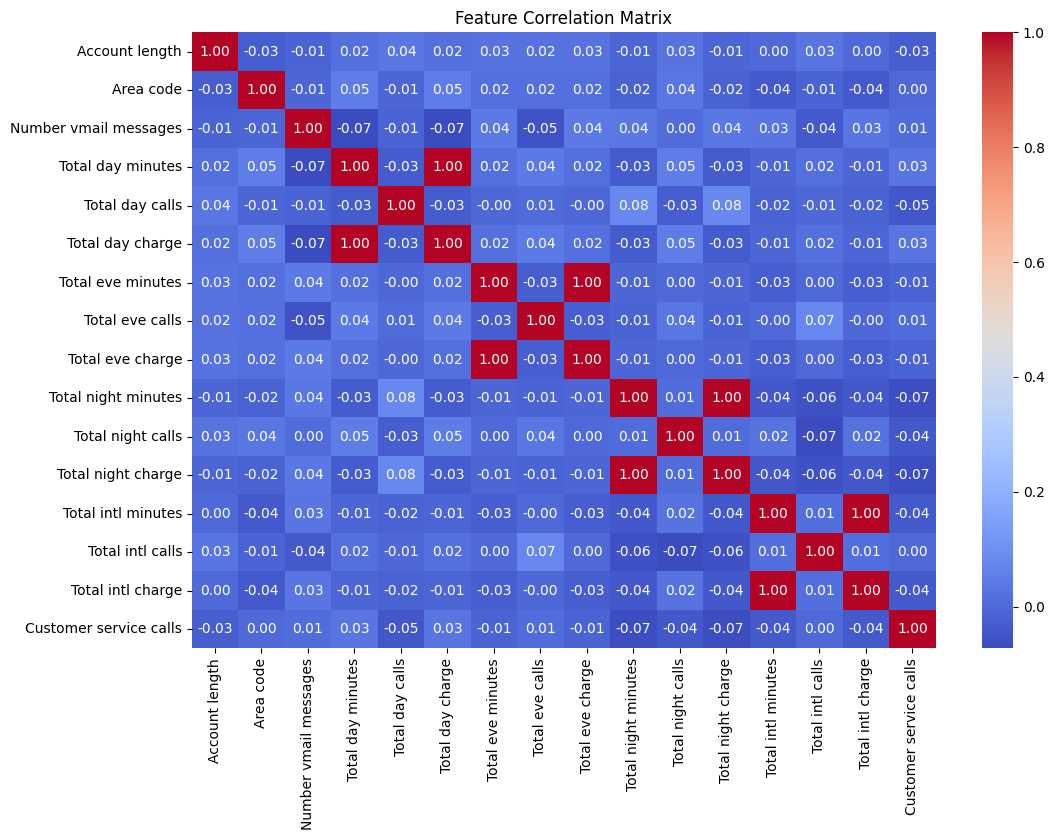

In [118]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

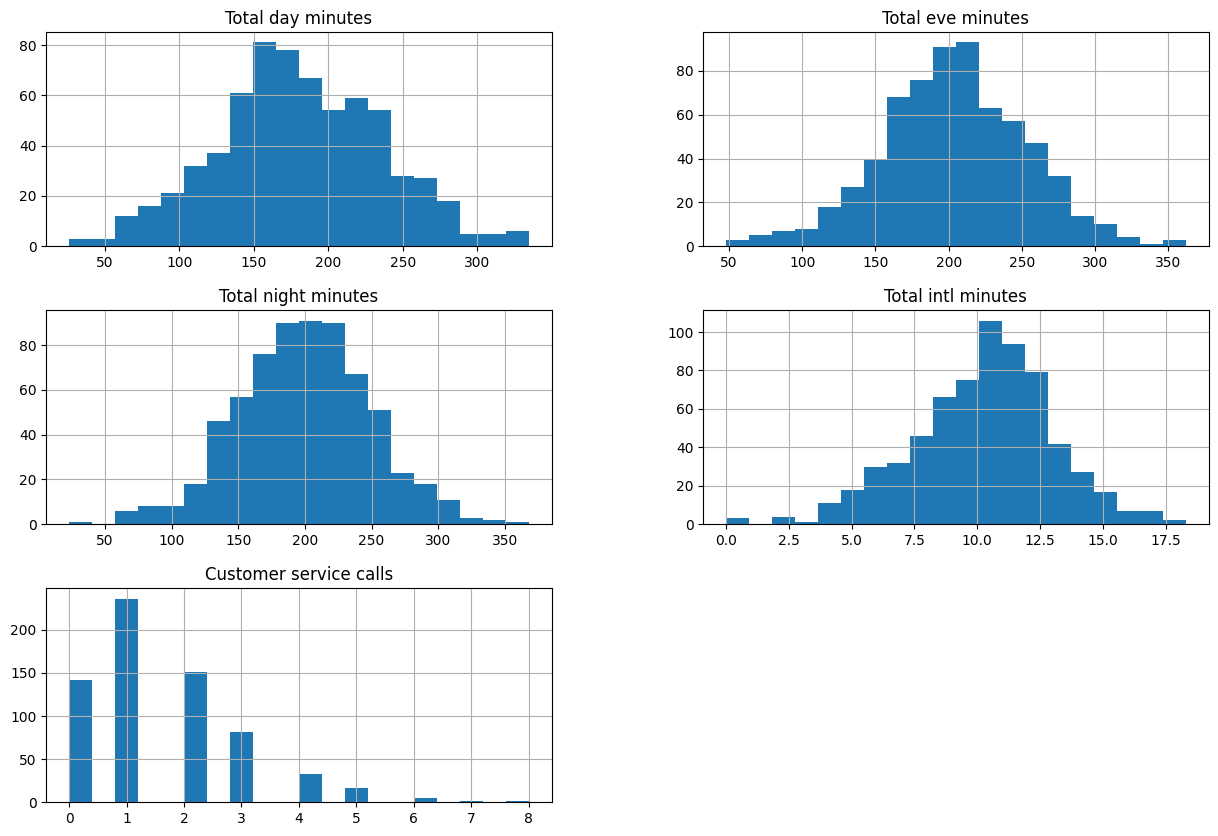

In [119]:
numeric_features = ["Total day minutes", "Total eve minutes", "Total night minutes", "Total intl minutes", "Customer service calls"]
df[numeric_features].hist(bins=20, figsize=(15, 10))
plt.show()


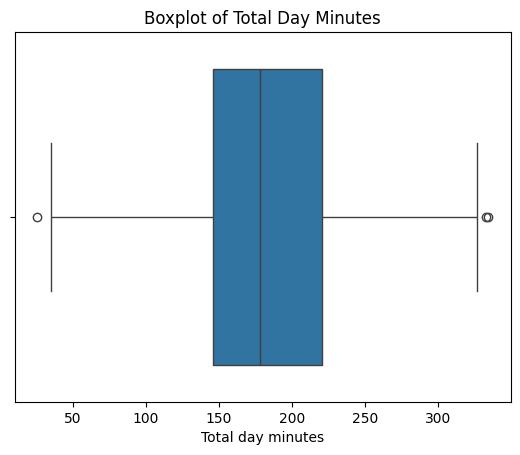

In [120]:
sns.boxplot(data=df, x='Total day minutes')
plt.title('Boxplot of Total Day Minutes')
plt.show()

In [121]:
df.isnull().sum()


State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [122]:
Q1 = df['Total day minutes'].quantile(0.25)
Q3 = df['Total day minutes'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Total day minutes'] < (Q1 - 1.5 * IQR)) | (df['Total day minutes'] > (Q3 + 1.5 * IQR)))]

In [123]:

df = pd.get_dummies(df, columns=["International plan", "Voice mail plan"], drop_first=True)
df.drop(['State'], axis=1, inplace=True)


In [124]:
from sklearn.preprocessing import StandardScaler

# Select numeric features for scaling
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

# Apply StandardScaler
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [125]:
from sklearn.decomposition import PCA

# Apply PCA (you can set n_components based on your needs)
pca = PCA(n_components=10)  # Adjust the number of components if necessary
df_pca = pca.fit_transform(df[numeric_features])


In [126]:
print("Unique values in target variable 'Churn':")
print(y.value_counts())
# Make sure the 'Churn' column is binary (0 or 1)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' or x == True else 0)


Unique values in target variable 'Churn':
Churn
0    571
1     93
Name: count, dtype: int64


In [127]:
print("Churn column value counts in y:")
print(y.value_counts())
# If `Churn` is categorical, encode it to binary
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
elif df['Churn'].dtype == 'bool':
    df['Churn'] = df['Churn'].astype(int)

y = df["Churn"]  # Re-assign y after encoding, if necessary
print("Value counts after encoding:")
print(y.value_counts())



Churn column value counts in y:
Churn
0    571
1     93
Name: count, dtype: int64
Value counts after encoding:
Churn
0    571
1     93
Name: count, dtype: int64


In [128]:
print(df["Churn"].value_counts())


Churn
0    571
1     93
Name: count, dtype: int64


In [129]:
from sklearn.ensemble import RandomForestClassifier

# Use class weights to handle imbalance
model_rf = RandomForestClassifier(class_weight='balanced')
model_rf.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced')

In [131]:
from sklearn.model_selection import train_test_split

# Perform a stratified split to ensure both classes are represented
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Check class distribution after stratified splitting
print("Training set class distribution:\n", y_train.value_counts())
print("Test set class distribution:\n", y_test.value_counts())


Training set class distribution:
 Churn
0    399
1     65
Name: count, dtype: int64
Test set class distribution:
 Churn
0    172
1     28
Name: count, dtype: int64


In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Random Forest with class weighting to handle imbalance
model = RandomForestClassifier(random_state=42, class_weight="balanced")

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [133]:
# Evaluate model performance
print("Classification Report:\n", classification_report(y_test, y_pred, labels=[0, 1]))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       172
           1       1.00      0.36      0.53        28

    accuracy                           0.91       200
   macro avg       0.95      0.68      0.74       200
weighted avg       0.92      0.91      0.89       200



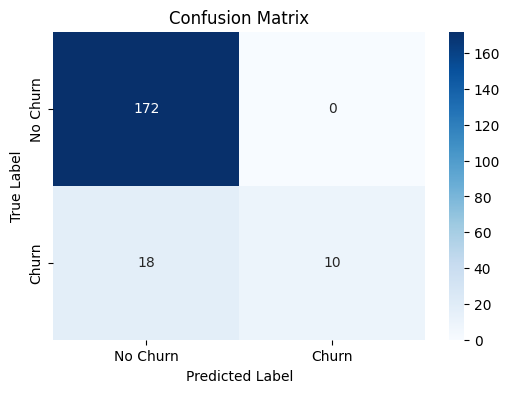

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix with specified labels
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


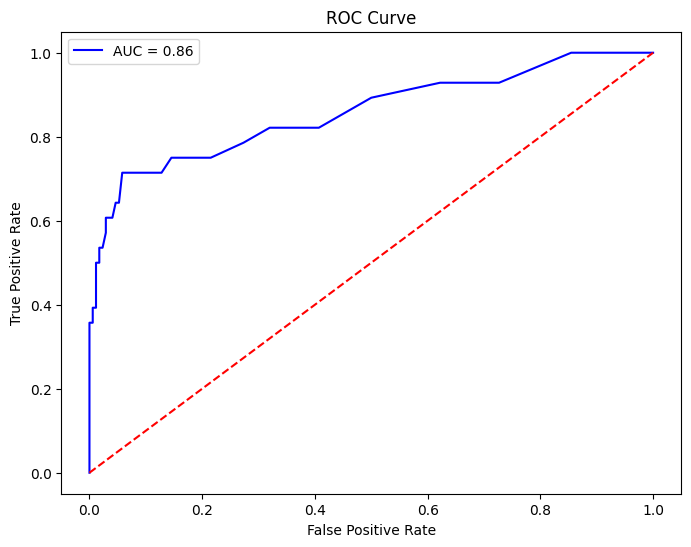

In [135]:
from sklearn.metrics import roc_auc_score, roc_curve

# Check if both classes are present in the test set
if len(np.unique(y_test)) == 2:
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
else:
    print("Cannot plot ROC Curve because only one class is present in y_test.")


In [137]:
import joblib
joblib.dump(model, "churn_prediction_model.pkl")


['churn_prediction_model.pkl']